## Abstract

## Extensive Feature Extraction for Stock Prediction

Forcasting Future Stock prices is a very hard problem to solve. An efficient Predictive model to correctly forecast future trend is crucial for Hedge funds and algorithmic trading. Specially in the case of Algorithmic Trading where error should me minimal as millions of dollars are at stake for each trade. Portfolio Optimization strategies needs to be backtested on historical data after predicting furture stock prices. 

Stock prices depends upon many factors like the Market behavious, other stocks, Index funds, Global news etc. We will try to capture many of these in our features.

In this project, we will look at this problem in many ways to Predict the Closing Prices - 
- 1. We will start with Extracting Features and see which performs well for predicting each stock. We will extract various Technical Indicators described below. 

- 2. Then check coorelation and Perform feature selection using RFECV Recursive feature Elimination using Random Forest to select best features. 

- 3. Then we will create a pipeline for this feature extraction and convert the entire code into Pipeline so anyone can easily run it and get the extracted features data for each stock. 

- 4. Next we will use Time Lagged data as a feature and create features based on previous day closing prices, Previous days Index funds prices. 

- 5. Then we will train 4 different Algorithms - Linear Regression, Random Forest, XG Boost, LSTM and GRU for forcasting nexy day price and test and evalute it on historical stock data. 

- 6. We will also create a Pipeline for this to train many stocks with many algorithms in just one go. 

- 7. We will Evaluate the data on around 2 years of data which is a long period, so it our models are closer overall, means we are doing great. Metrics we will use are MAE, MAPE, R2 and RMSE. Final Metrics which we will look at to compare models is MAE(Mean Absolute Error)

- 8. We will also check feature importance of various features using Random forest and XG boost in this. 

- 9. We will pick the best algorithm from these, and will tune the Number of lagged days to consider for forcasting for each type like Stock price, other index Funds previous prices. 

- 10. For LSTM, we will use Lagged previous days prices for a lookback period of 30-60 days. 

- 11. Then we will create a Portfolio of these stocks and will build a strategy using sharpe ratio to optimize the portfolio and allocate the money of a fund effectively. 

- 12. As a future scope, we will also try to create a dashboard to Show the comparison of 2 portfolios before and after optimization. 


## Feature Extraction

We will create features using various Technical indicators and Lagged prices as described below. All of these features have something to offer for forcasting. Some tells us about the trend, some gives us a signal if the stock is overbought or oversold, some portrays the strength of the price trend. 

#### Bollinger Bands
A Bollinger Band® is a technical analysis tool defined by a set of lines plotted two standard deviations (positively and negatively) away from a simple moving average (SMA) of the Stocks's price
Bollinger Bands allow traders to monitor and take advantage of shifts in price volatilities

Main Components of a Bollinger Bands
- Upper Band: The upper band is simply two standard deviations above the moving average of a stock’s price.
- Middle Band: The middle band is simply the moving average of the stock’s price.
- Lower Band: Two standard deviations below the moving average is the lower band.

#### Simple Moving Average (SMA)
A simple moving average (SMA) calculates the average of a selected range of prices, usually closing prices, by the number of periods in that range.
SMA is basically the average price of the given time period, with equal weighting given to the price of each period.
Formula: SMA = ( Sum ( Price, n ) ) / n

#### Exponential moving average (EMA)
An exponential moving average (EMA) is a type of moving average (MA) that places a greater weight and significance on the most recent data points. The exponential moving average is also referred to as the exponentially weighted moving average. An exponentially weighted moving average reacts more significantly to recent price changes than a simple moving average (SMA), which applies an equal weight to all observations in the period.


#### Average true range (ATR)
The average true range (ATR) is a technical analysis indicator that measures market volatility by decomposing the entire range of an asset price for that period.
ATR measures market volatility. It is typically derived from the 14-day moving average of a series of true range indicators.


#### Average Directional Index (ADX)
ADX stands for Average Directional Movement Index and can be used to help measure the overall strength of a trend. The ADX indicator is an average of expanding price range values.
ADX indicates the strength of a trend in price time series. It is a combination of the negative and positive directional movements indicators computed over a period of n past days corresponding to the input window length (typically 14 days)


#### Commodity Channel Index (CCI)
Commodity Channel Index (CCI) is a momentum-based oscillator used to help determine when an investment vehicle is reaching a condition of being overbought or oversold. It is also used to assess price trend direction and strength. 

CCI = (typical price − ma) / (0.015 * mean deviation)
typical price = (high + low + close) / 3
p = number of periods (20 commonly used)
ma = moving average
moving average = typical price / p
mean deviation = (typical price — MA) / p


#### Rate-of-change (ROC)
ROC measures the percentage change in price between the current price and the price a certain number of periods ago.


#### Relative Strength Index (RSI)
RSI compares the size of recent gains to recent losses, it is intended to reveal the strength or weakness of a price trend from a range of closing prices over a time period.


#### William’s %R
Williams %R, also known as the Williams Percent Range, is a type of momentum indicator that moves between 0 and -100 and measures overbought and oversold levels. The Williams %R may be used to find entry and exit points in the market. 


#### Stochastic %K
A stochastic oscillator is a momentum indicator comparing a particular closing price of a security to a range of its prices over a certain period of time. 
It compares a close price and its price interval during a period of n past days and gives a signal meaning that a stock is oversold or overbought.

### Index Funds

Stock Prices also are affeted by other Stocks and Index Funds. So for our analysis we will use 3 different Stock Index Funds -

1. Nasdaq-100 QQQ Index ETF Fund
Invesco QQQ is an exchange-traded fund based on the Nasdaq-100 Index®. The Fund will, under most circumstances, consist of all of stocks in the Index. The Index includes 100 of the largest domestic and international nonfinancial companies listed on the Nasdaq Stock Market based on market capitalization

2. S&P 500 Index fund 
The S&P 500 is a stock market index that measures the stock performance of 500 large companies listed on stock exchanges in the United States.

3. DJIA - Dow Jones industrial Average 
DJIA is a stock market index that measures the stock performance of 30 large companies listed on stock exchanges in the United States. 

In [2]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
from datetime import datetime
import yfinance as yf
import talib

from typing import TypeVar, Callable, Sequence
from functools import reduce
T = TypeVar('T')


%matplotlib inline


### Pipeline to Scrape the Historical Stocks data and Extract features from it. 

Initiating Pipeline....
Loading Historical Price data for GS....


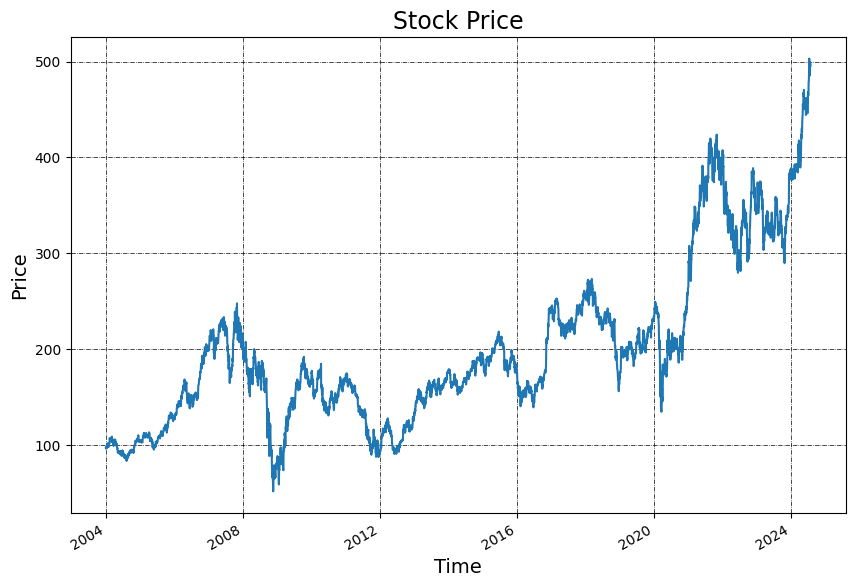

 
Feature extraction of technical Indicators....
Boolinger bands..
Lagged Price data for previous days....
Simple Moving Average....
Exponential Moving Average....
Commodity Channel Index....
Stocastic %K ....
Force index....


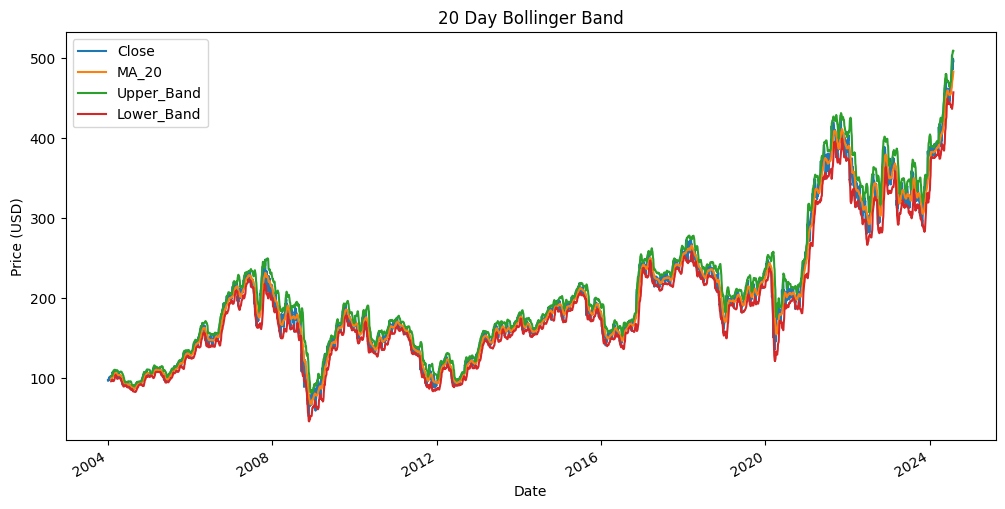

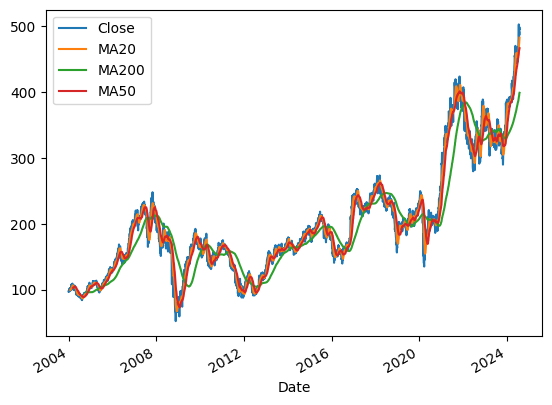

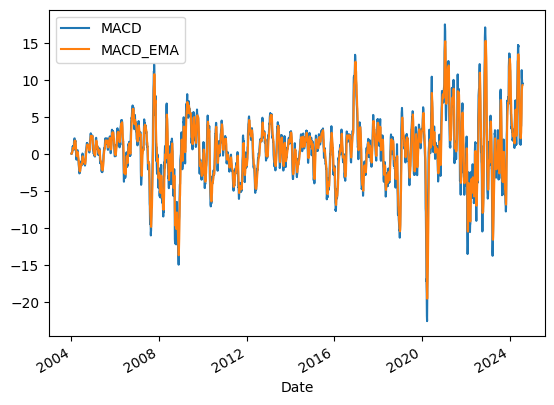

 
Extracting information from dates....
 
Fetching data for NASDAQ-100 Index Fund ETF QQQ & S&P 500 index ......
 
Adding the future day close price as a target column for Forcast Horizon of 1
Saving extracted features data in S3 Bucket....
Extracted features shape - (4977, 71)
 
Extracted features dataframe - 
                  Open        High         Low    Close(t)   Adj Close  \
Date                                                                     
2004-10-18   94.160004   94.449997   93.089996   94.250000   69.965393   
2004-10-19   94.250000   95.000000   92.599998   93.059998   69.082069   
2004-10-20   92.110001   92.690002   90.739998   92.339996   68.547539   
2004-10-21   92.000000   93.849998   91.980003   93.470001   69.574707   
2004-10-22   93.019997   93.739998   92.010002   92.699997   69.001610   
...                ...         ...         ...         ...         ...   
2024-07-22  484.559998  489.470001  482.380005  487.040009  487.040009   
2024-07-23  487.07998

In [5]:
class Stocks:
    def __init__(self, ticker, start_date, forcast_horz):
        self.Ticker = ticker
        self.Start_Date = start_date
        self.forcast_horz = forcast_horz
        
    
    def get_stock_data(self, Ticker):
        print('Loading Historical Price data for ' + self.Ticker + '....')
        self.df_Stock = yf.download(self.Ticker, start=self.Start_Date, end=None, progress=False)
    
        # Rename columns 
        self.df_Stock = self.df_Stock.rename(columns={
            'Open': 'Open', 
            'High': 'High', 
            'Low': 'Low', 
            'Close': 'Close', 
            'Volume': 'Volume'
        })
        self.df_Stock = self.df_Stock.rename_axis(['Date'])
        
        
        #sorting index
        self.Stock = self.df_Stock.sort_index(ascending=True, axis=0)
        #slicing the data for 15 years from '2004-01-02' to today
        self.Stock = self.Stock.loc[self.Start_Date:]

        self.Stock['Close'].plot(figsize=(10, 7))
        plt.title("Stock Price", fontsize=17)
        plt.ylabel('Price', fontsize=14)
        plt.xlabel('Time', fontsize=14)
        plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
        plt.show()

  
    def extract_Technical_Indicators(self, Ticker):
        
        print(' ')
        print('Feature extraction of technical Indicators....')
        #get Boolinger Bands
        self.Stock['MA_20'] = self.Stock.Close.rolling(window=20).mean()
        self.Stock['SD20'] = self.Stock.Close.rolling(window=20).std()
        self.Stock['Upper_Band'] = self.Stock.Close.rolling(window=20).mean() + (self.Stock['SD20']*2)
        self.Stock['Lower_Band'] = self.Stock.Close.rolling(window=20).mean() - (self.Stock['SD20']*2)
        print('Boolinger bands..')

        #shifting for lagged data 
        self.Stock['S_Close(t-1)'] = self.Stock.Close.shift(periods=1)
        self.Stock['S_Close(t-2)'] = self.Stock.Close.shift(periods=2)
        self.Stock['S_Close(t-3)'] = self.Stock.Close.shift(periods=3)
        self.Stock['S_Close(t-5)'] = self.Stock.Close.shift(periods=5)
        self.Stock['S_Open(t-1)'] = self.Stock.Open.shift(periods=1)
        print('Lagged Price data for previous days....')

        #simple moving average
        self.Stock['MA5'] = self.Stock.Close.rolling(window=5).mean()
        self.Stock['MA10'] = self.Stock.Close.rolling(window=10).mean()
        self.Stock['MA20'] = self.Stock.Close.rolling(window=20).mean()
        self.Stock['MA50'] = self.Stock.Close.rolling(window=50).mean()
        self.Stock['MA200'] = self.Stock.Close.rolling(window=200).mean()
        print('Simple Moving Average....')

        #Exponential Moving Averages
        self.Stock['EMA10'] = self.Stock.Close.ewm(span=5, adjust=False).mean().fillna(0)
        self.Stock['EMA20'] = self.Stock.Close.ewm(span=5, adjust=False).mean().fillna(0)
        self.Stock['EMA50'] = self.Stock.Close.ewm(span=5, adjust=False).mean().fillna(0)
        self.Stock['EMA100'] = self.Stock.Close.ewm(span=5, adjust=False).mean().fillna(0)
        self.Stock['EMA200'] = self.Stock.Close.ewm(span=5, adjust=False).mean().fillna(0)
        print('Exponential Moving Average....')

        #Moving Average Convergance Divergances
        self.Stock['EMA_12'] = self.Stock.Close.ewm(span=12, adjust=False).mean()
        self.Stock['EMA_26'] = self.Stock.Close.ewm(span=26, adjust=False).mean()
        self.Stock['MACD'] = self.Stock['EMA_12'] - self.Stock['EMA_26']

        self.Stock['MACD_EMA'] = self.Stock.MACD.ewm(span=9, adjust=False).mean()
        
        

        #Average True Range
        self.Stock['ATR'] = talib.ATR(self.Stock['High'].values, self.Stock['Low'].values, self.Stock['Close'].values, timeperiod=14)

        #Average Directional Index
        self.Stock['ADX'] = talib.ADX(self.Stock['High'], self.Stock['Low'], self.Stock['Close'], timeperiod=14)

        #Commodity Channel index
        tp = (self.Stock['High'] + self.Stock['Low'] + self.Stock['Close']) /3
        ma = tp/20 
        md = (tp-ma)/20
        self.Stock['CCI'] = (tp-ma)/(0.015 * md)
        print('Commodity Channel Index....')

        #Rate of Change 
        self.Stock['ROC'] = ((self.Stock['Close'] - self.Stock['Close'].shift(10)) / (self.Stock['Close'].shift(10)))*100

        #Relative Strength Index
        self.Stock['RSI'] = talib.RSI(self.Stock.Close.values, timeperiod=14)

        #William's %R
        self.Stock['William%R'] = talib.WILLR(self.Stock.High.values, self.Stock.Low.values, self.Stock.Close.values, 14) 

        #Stocastic K
        self.Stock['SO%K'] = ((self.Stock.Close - self.Stock.Low.rolling(window=14).min()) / (self.Stock.High.rolling(window=14).max() - self.Stock.Low.rolling(window=14).min())) * 100
        print('Stocastic %K ....')
        #Standard Deviation of last 5 day returns
        self.Stock['per_change'] = self.Stock.Close.pct_change()
        self.Stock['STD5'] = self.Stock.per_change.rolling(window=5).std()

        #Force Index
        self.Stock['ForceIndex1'] = self.Stock.Close.diff(1) * self.Stock.Volume
        self.Stock['ForceIndex20'] = self.Stock.Close.diff(20) * self.Stock.Volume
        print('Force index....')

        #print('Stock Data ', self.Stock)
        
        self.Stock[['Close', 'MA_20', 'Upper_Band', 'Lower_Band']].plot(figsize=(12,6))
        plt.title('20 Day Bollinger Band')
        plt.ylabel('Price (USD)')
        plt.show();
        
        self.Stock[['Close', 'MA20', 'MA200', 'MA50']].plot()
        plt.show();

        self.Stock[['MACD', 'MACD_EMA']].plot()
        plt.show();
        #Dropping unneccesary columns
        self.Stock = self.Stock.drop(columns=['MA_20', 'per_change', 'EMA_12', 'EMA_26'])
        

        
    def extract_info(self, date_val):

        Day = date_val.day
        DayofWeek = date_val.dayofweek
        Dayofyear = date_val.dayofyear
        Week = date_val.week
        Is_month_end = date_val.is_month_end.real
        Is_month_start = date_val.is_month_start.real
        Is_quarter_end = date_val.is_quarter_end.real
        Is_quarter_start = date_val.is_quarter_start.real
        Is_year_end = date_val.is_year_end.real
        Is_year_start = date_val.is_year_start.real
        Is_leap_year = date_val.is_leap_year.real
        Year = date_val.year
        Month = date_val.month

        return Day, DayofWeek, Dayofyear, Week, Is_month_end, Is_month_start, Is_quarter_end, Is_quarter_start, Is_year_end, Is_year_start, Is_leap_year, Year, Month


    def extract_date_features(self, Ticker):
        print(' ')
        self.Stock['Date_col'] = self.Stock.index
        
        self.Stock[['Day', 'DayofWeek', 'DayofYear', 'Week', 'Is_month_end', 'Is_month_start',
          'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start', 'Is_leap_year', 'Year', 'Month']] = self.Stock.Date_col.apply(lambda date_val: pd.Series(self.extract_info(date_val)))
        print('Extracting information from dates....')
        
    
    def get_IDXFunds_features(self, Ticker):
        print(' ')
        print('Fetching data for NASDAQ-100 Index Fund ETF QQQ & S&P 500 index ......')

        # Nasdaq-100 Index Fund ETF QQQ
        QQQ = yf.Ticker('QQQ').history(start=self.Start_Date)
        QQQ = QQQ.rename(columns={'Close': 'QQQ_Close'})
        QQQ = QQQ.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])
        QQQ.index = QQQ.index.tz_localize(None)  # Ensure timezone-naive

        # S&P 500 Index Fund 
        SnP = yf.Ticker('^GSPC').history(start=self.Start_Date)
        SnP = SnP.rename(columns={'Close': 'SnP_Close'})
        SnP = SnP.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])
        SnP.index = SnP.index.tz_localize(None)  # Ensure timezone-naive

        # Dow Jones Industrial Average Index Fund 
        DJIA = yf.Ticker('^DJI').history(start=self.Start_Date)
        DJIA = DJIA.rename(columns={'Close': 'DJIA_Close'})
        DJIA = DJIA.drop(columns=['Open', 'High', 'Low', 'Volume', 'Dividends', 'Stock Splits'])
        DJIA.index = DJIA.index.tz_localize(None)  # Ensure timezone-naive

        # Process QQQ Data
        QQQ = QQQ.sort_index(ascending=True)
        QQQ['QQQ(t-1)'] = QQQ.QQQ_Close.shift(periods=1)
        QQQ['QQQ(t-2)'] = QQQ.QQQ_Close.shift(periods=2)
        QQQ['QQQ(t-5)'] = QQQ.QQQ_Close.shift(periods=5)
        QQQ['QQQ_MA10'] = QQQ.QQQ_Close.rolling(window=10).mean()
        QQQ['QQQ_MA20'] = QQQ.QQQ_Close.rolling(window=20).mean()
        QQQ['QQQ_MA50'] = QQQ.QQQ_Close.rolling(window=50).mean()

        # Process SnP Data
        SnP = SnP.sort_index(ascending=True)
        SnP['SnP(t-1)'] = SnP.SnP_Close.shift(periods=1)
        SnP['SnP(t-5)'] = SnP.SnP_Close.shift(periods=5)

        # Process DJIA Data
        DJIA = DJIA.sort_index(ascending=True)
        DJIA['DJIA(t-1)'] = DJIA.DJIA_Close.shift(periods=1)
        DJIA['DJIA(t-5)'] = DJIA.DJIA_Close.shift(periods=5)

        # Merge index funds 
        IDXFunds = QQQ.merge(SnP, left_index=True, right_index=True)
        IDXFunds = IDXFunds.merge(DJIA, left_index=True, right_index=True)
        self.Stock = self.Stock.merge(IDXFunds, left_index=True, right_index=True)
        
        
        
    def forcast_Horizon(self, Ticker):
    
        print(' ')
        print('Adding the future day close price as a target column for Forcast Horizon of ' + str(self.forcast_horz))
        #Adding the future day close price as a target column which needs to be predicted using Supervised Machine learning models
        self.Stock['Close_forcast'] = self.Stock.Close.shift(-self.forcast_horz)
        self.Stock = self.Stock.rename(columns={'Close': 'Close(t)'})
        self.Stock = self.Stock.dropna()

        
    def save_features(self, Ticker):
        print('Saving extracted features data in S3 Bucket....')
        self.Stock.to_csv(self.Ticker + '.csv')
        print('Extracted features shape - '+ str(self.Stock.shape))
        print(' ')
        print('Extracted features dataframe - ')
        print(self.Stock)
        return self.Stock
        
        
    T = TypeVar('T')

    def pipeline(self,
        value: T,
        function_pipeline: Sequence[Callable[[T], T]],
        ) -> T:    
        return reduce(lambda v, f: f(v), function_pipeline, value)

    def pipeline_sequence(self):

        print('Initiating Pipeline....')
        z = self.pipeline(
            value=self.Ticker,
            function_pipeline=(
                self.get_stock_data,
                self.extract_Technical_Indicators,
                self.extract_date_features, 
                self.get_IDXFunds_features,
                self.forcast_Horizon,
                self.save_features
                    )
                )

        print(f'z={z}')
        


features = Stocks('GS', '2004-01-02', 1)
features.pipeline_sequence()

